# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Kevin Tan]
- **Email:** [kvintan26@gmail.com]
- **ID Dicoding:** [kevintan]

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penyewaan sepeda dalam beberapa bulan terakhir?
- Pada season apa tercatat penyewaan sepeda terbanyak dan tersedikit?
- Bagaimana dampak cuaca terhadap jumlah pengunaan sepeda?
- Seberapa sering pelanggan menggunakan sepeda di weekdays dibandingkan weekend?

## Import Semua Packages/Library yang Digunakan

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

## Data Wrangling

### Gathering Data

In [26]:
# Import the csv file from local
day_df = pd.read_csv('day.csv')
hour_df = pd.read_csv('hour.csv')

In [32]:
# Show the data
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,hum,windspeed,casual,registered,cnt,year,month,day,season_name,is_weekend
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0.805833,0.160446,331,654,985,2011,1,1,Springer,1
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,0.696087,0.248539,131,670,801,2011,1,2,Springer,0
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,0.437273,0.248309,120,1229,1349,2011,1,3,Springer,0
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,0.590435,0.160296,108,1454,1562,2011,1,4,Springer,0
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,0.436957,0.186900,82,1518,1600,2011,1,5,Springer,0


In [33]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,hum,windspeed,casual,registered,cnt,year,month,day,season_name,is_weekend
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0.81,0.0,3,13,16,2011,1,1,Springer,1
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0.80,0.0,8,32,40,2011,1,1,Springer,1
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0.80,0.0,5,27,32,2011,1,1,Springer,1
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,0.75,0.0,3,10,13,2011,1,1,Springer,1
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0.75,0.0,0,1,1,2011,1,1,Springer,1


**Insight:**
- The data is imported successfully.

### Assessing Data

In [34]:
# Check the completeness of the data (day_df)
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      731 non-null    int64         
 1   dteday       731 non-null    datetime64[ns]
 2   season       731 non-null    category      
 3   yr           731 non-null    category      
 4   mnth         731 non-null    category      
 5   holiday      731 non-null    category      
 6   weekday      731 non-null    category      
 7   workingday   731 non-null    category      
 8   weathersit   731 non-null    category      
 9   temp         731 non-null    float64       
 10  atemp        731 non-null    float64       
 11  hum          731 non-null    float64       
 12  windspeed    731 non-null    float64       
 13  casual       731 non-null    int64         
 14  registered   731 non-null    int64         
 15  cnt          731 non-null    int64         
 16  year    

In [35]:
# Check the completeness of the data (day_df)
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      17379 non-null  int64         
 1   dteday       17379 non-null  datetime64[ns]
 2   season       17379 non-null  category      
 3   yr           17379 non-null  category      
 4   mnth         17379 non-null  category      
 5   hr           17379 non-null  int64         
 6   holiday      17379 non-null  category      
 7   weekday      17379 non-null  category      
 8   workingday   17379 non-null  category      
 9   weathersit   17379 non-null  category      
 10  temp         17379 non-null  float64       
 11  atemp        17379 non-null  float64       
 12  hum          17379 non-null  float64       
 13  windspeed    17379 non-null  float64       
 14  casual       17379 non-null  int64         
 15  registered   17379 non-null  int64         
 16  cnt 

In [27]:
# Check if day_df and hour_df have null value
print("Missing values in day_df:")
print(day_df.isnull().sum())

print("\nMissng values in hour_df:")
print(hour_df.isnull().sum())

Missing values in day_df:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Missng values in hour_df:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [36]:
# Check the day_df data using describe()
day_df.describe()

,instant,dteday,temp,atemp,hum,windspeed,casual,registered,cnt,year,month,day,is_weekend
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,2011.500684,6.519836,15.738714,0.285910
min,1.000000,2011-01-01 00:00:00,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,2011.000000,1.000000,1.000000,0.000000
25%,183.500000,2011-07-02 12:00:00,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,2011.000000,4.000000,8.000000,0.000000
50%,366.000000,2012-01-01 00:00:00,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,2012.000000,7.000000,16.000000,0.000000
75%,548.500000,2012-07-01 12:00:00,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,2012.000000,10.000000,23.000000,1.000000
max,731.000000,2012-12-31 00:00:00,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,2012.000000,12.000000,31.000000,1.000000
std,211.165812,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452,0.500342,3.451913,8.809949,0.452156


In [37]:
# Check the hour_df data using describe()
hour_df.describe()

,instant,dteday,hr,temp,atemp,hum,windspeed,casual,registered,cnt,year,month,day,is_weekend
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,11.546752,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,2011.502561,6.537775,15.683411,0.287646
min,1.0000,2011-01-01 00:00:00,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000
25%,4345.5000,2011-07-04 00:00:00,6.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,2011.000000,4.000000,8.000000,0.000000
50%,8690.0000,2012-01-02 00:00:00,12.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,2012.000000,7.000000,16.000000,0.000000
75%,13034.5000,2012-07-02 00:00:00,18.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,2012.000000,10.000000,23.000000,1.000000
max,17379.0000,2012-12-31 00:00:00,23.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,2012.000000,12.000000,31.000000,1.000000
std,5017.0295,NaN,6.914405,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,0.500008,3.438776,8.789373,0.452678


In [38]:
# Check the day_df using info()
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      731 non-null    int64         
 1   dteday       731 non-null    datetime64[ns]
 2   season       731 non-null    category      
 3   yr           731 non-null    category      
 4   mnth         731 non-null    category      
 5   holiday      731 non-null    category      
 6   weekday      731 non-null    category      
 7   workingday   731 non-null    category      
 8   weathersit   731 non-null    category      
 9   temp         731 non-null    float64       
 10  atemp        731 non-null    float64       
 11  hum          731 non-null    float64       
 12  windspeed    731 non-null    float64       
 13  casual       731 non-null    int64         
 14  registered   731 non-null    int64         
 15  cnt          731 non-null    int64         
 16  year    

In [39]:
# Check the hour_df using info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      17379 non-null  int64         
 1   dteday       17379 non-null  datetime64[ns]
 2   season       17379 non-null  category      
 3   yr           17379 non-null  category      
 4   mnth         17379 non-null  category      
 5   hr           17379 non-null  int64         
 6   holiday      17379 non-null  category      
 7   weekday      17379 non-null  category      
 8   workingday   17379 non-null  category      
 9   weathersit   17379 non-null  category      
 10  temp         17379 non-null  float64       
 11  atemp        17379 non-null  float64       
 12  hum          17379 non-null  float64       
 13  windspeed    17379 non-null  float64       
 14  casual       17379 non-null  int64         
 15  registered   17379 non-null  int64         
 16  cnt 

In [28]:
# Convert the date data to datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [29]:
# Change all the categorical data into categorical types
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

for column in categorical_columns:
  day_df[column] = day_df[column].astype('category')
  hour_df[column] = hour_df[column].astype('category')

In [30]:
# Extract the year, month, and day from the dteday for both of the csv
day_df['year'] = day_df['dteday'].dt.year
day_df['month'] = day_df['dteday'].dt.month
day_df['day'] = day_df['dteday'].dt.day

hour_df['year'] = hour_df['dteday'].dt.year
hour_df['month'] = hour_df['dteday'].dt.month
hour_df['day'] = hour_df['dteday'].dt.day

# Create mapping for the season name so more readable
season_mapping = {1: 'Springer', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_df['season_name'] = day_df['season'].map(season_mapping)
hour_df['season_name'] = hour_df['season'].map(season_mapping)

# Create column to check if it is weekend or not
day_df['is_weekend'] = day_df['weekday'].apply(lambda x: 1 if x >= 5 else 0)
hour_df['is_weekend'] = hour_df['weekday'].apply(lambda x: 1 if x >= 5 else 0)

In [31]:
# Check if there is duplicate
print("Duplicate in day_df: ", day_df.duplicated().sum())
print("Duplicate in hour_df: ", hour_df.duplicated().sum())

Duplicate in day_df:  0
Duplicate in hour_df:  0


In [42]:
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,hum,windspeed,casual,registered,cnt,year,month,day,season_name,is_weekend
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0.805833,0.160446,331,654,985,2011,1,1,Springer,1
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,0.696087,0.248539,131,670,801,2011,1,2,Springer,0
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,0.437273,0.248309,120,1229,1349,2011,1,3,Springer,0
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,0.590435,0.160296,108,1454,1562,2011,1,4,Springer,0
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,0.436957,0.186900,82,1518,1600,2011,1,5,Springer,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,...,0.652917,0.350133,247,1867,2114,2012,12,27,Springer,0
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,...,0.590000,0.155471,644,2451,3095,2012,12,28,Springer,1
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,...,0.752917,0.124383,159,1182,1341,2012,12,29,Springer,1
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,...,0.483333,0.350754,364,1432,1796,2012,12,30,Springer,0


**Insight:**
- There is no missing data or null value in both of the csv file.
- There is no weird/anomaly data after i check it using describe().
- There is nothing wrong with the data after checked using info().
- I made mapping for the seasonal and weekday so i know the season name and it is weekend or not.
- There is no duplicate data in the file.

### Cleaning Data

**Insight:**
- There is no duplicate datas so we don't need to delete the duplicate datas.
- There is no missing values so we don't need to delete the missing values.
- There is no inaccurate values so we don't need to fix it.
- The code for looking for duplicates, missing, and inaccurate is already in the assessing data section, so i don't write it again in this step
- Summary in the cleaning data section: We don't need to clean any data because the data is good for the next step.

## Exploratory Data Analysis (EDA), Visualization, and Conclusion

I'll combine the visualization after each data that i analize so the reviewer can easily check the plot. I also give the conclusion in the end of the section, so the reviewer can read the conclusion after saw the plot.

### Explore ...

In [40]:
# See all the data in day_df
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,hum,windspeed,casual,registered,cnt,year,month,day,season_name,is_weekend
count,731.000000,731,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.000000,...,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731,731.000000
unique,NaN,NaN,4.0,2.0,12.0,2.0,7.0,2.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
top,NaN,NaN,3.0,1.0,1.0,0.0,0.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,NaN
freq,NaN,NaN,188.0,366.0,62.0,710.0,105.0,500.0,463.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,...,0.627894,0.190486,848.176471,3656.172367,4504.348837,2011.500684,6.519836,15.738714,NaN,0.285910
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,...,0.000000,0.022392,2.000000,20.000000,22.000000,2011.000000,1.000000,1.000000,NaN,0.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,...,0.520000,0.134950,315.500000,2497.000000,3152.000000,2011.000000,4.000000,8.000000,NaN,0.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,...,0.626667,0.180975,713.000000,3662.000000,4548.000000,2012.000000,7.000000,16.000000,NaN,0.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,...,0.730209,0.233214,1096.000000,4776.500000,5956.000000,2012.000000,10.000000,23.000000,NaN,1.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,...,0.972500,0.507463,3410.000000,6946.000000,8714.000000,2012.000000,12.000000,31.000000,NaN,1.000000


In [41]:
# See all the data in the hour_df
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,hum,windspeed,casual,registered,cnt,year,month,day,season_name,is_weekend
count,17379.0000,17379,17379.0,17379.0,17379.0,17379.000000,17379.0,17379.0,17379.0,17379.0,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379.000000
unique,NaN,NaN,4.0,2.0,12.0,NaN,2.0,7.0,2.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
top,NaN,NaN,3.0,1.0,5.0,NaN,0.0,6.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,NaN
freq,NaN,NaN,4496.0,8734.0,1488.0,NaN,16879.0,2512.0,11865.0,11413.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4496,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,NaN,...,0.627229,0.190098,35.676218,153.786869,189.463088,2011.502561,6.537775,15.683411,NaN,0.287646
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,NaN,0.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,...,0.480000,0.104500,4.000000,34.000000,40.000000,2011.000000,4.000000,8.000000,NaN,0.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,...,0.630000,0.194000,17.000000,115.000000,142.000000,2012.000000,7.000000,16.000000,NaN,0.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,...,0.780000,0.253700,48.000000,220.000000,281.000000,2012.000000,10.000000,23.000000,NaN,1.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,...,1.000000,0.850700,367.000000,886.000000,977.000000,2012.000000,12.000000,31.000000,NaN,1.000000


In [47]:
# Check the day_df transactions happened based on the season_name
day_df.groupby(by="season_name").agg({
  "instant": "nunique",
  "cnt": ["max", "min", "std", "mean", "sum"]
})

C:\Users\kvint\AppData\Local\Temp\ipykernel_7476\1663561681.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="season_name").agg({


instant   cnt                                         
            nunique   max   min          std         mean      sum
season_name                                                       
Springer        181  7836   431  1399.942119  2604.132597   471348
Summer          184  8362   795  1695.977235  4992.331522   918589
Fall            188  8714  1115  1459.800381  5644.303191  1061129
Winter          178  8555    22  1699.615261  4728.162921   841613

In [48]:
# Check the day_df transactions happened based on the season_name
hour_df.groupby(by="season_name").agg({
  "instant": "nunique",
  "cnt": ["max", "min", "std", "mean", "sum"]
})

C:\Users\kvint\AppData\Local\Temp\ipykernel_7476\448149103.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by="season_name").agg({


instant  cnt                                     
            nunique  max min         std        mean      sum
season_name                                                  
Springer       4242  801   1  119.224010  111.114569   471348
Summer         4409  957   1  188.362473  208.344069   918589
Fall           4496  977   1  197.711630  236.016237  1061129
Winter         4232  967   1  182.967972  198.868856   841613

C:\Users\kvint\AppData\Local\Temp\ipykernel_7476\3439541110.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_transactions = day_df.groupby('season_name')['cnt'].sum().reset_index()
C:\Users\kvint\AppData\Local\Temp\ipykernel_7476\3439541110.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season_name', y='cnt', data=seasonal_transactions, palette=colors)


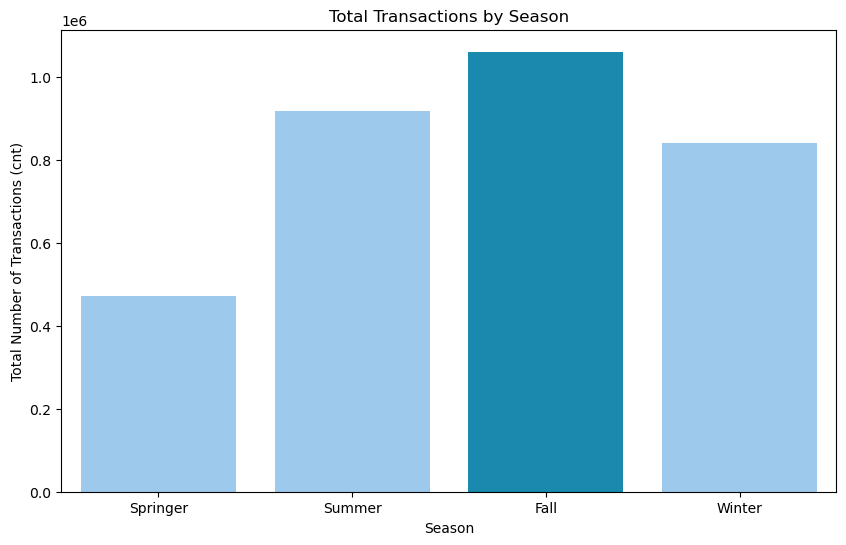

Text(0.5, 1.0, 'Total Transactions by Season')

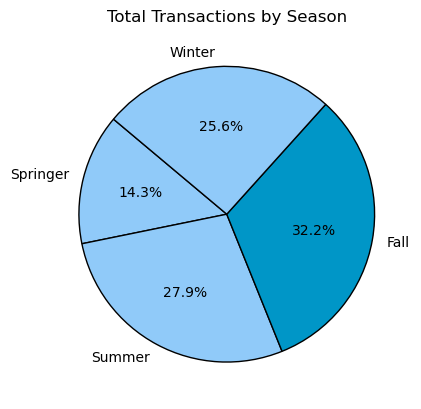

In [66]:
# Plot the season and the transactions that happen
seasonal_transactions = day_df.groupby('season_name')['cnt'].sum().reset_index()

highest_season_index = seasonal_transactions['cnt'].idxmax()

colors = ['#90CAF9'] * len(seasonal_transactions)
colors[highest_season_index] = '#0096C7'

# Plotting the total transactions for each season
plt.figure(figsize=(10, 6))
sns.barplot(x='season_name', y='cnt', data=seasonal_transactions, palette=colors)
plt.title('Total Transactions by Season')
plt.xlabel('Season')
plt.ylabel('Total Number of Transactions (cnt)')
plt.show()

# Pie chart
plt.pie(
    seasonal_transactions['cnt'],
    labels=seasonal_transactions['season_name'],
    colors=colors,
    autopct='%1.1f%%',  # Adding percentage labels
    startangle=140,  # Rotate the start angle for better visibility
    wedgeprops={'edgecolor': 'black'}  # Adding edge color for better separation
)
plt.title('Total Transactions by Season')

In [58]:
# Check the day_df transactions based on the weather
day_df.groupby(by="weathersit").agg({
  "instant": "nunique",
  "cnt": ["sum"]
})

C:\Users\kvint\AppData\Local\Temp\ipykernel_7476\1681087715.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="weathersit").agg({


,instant,cnt
,nunique,sum
weathersit,,
1,463,2257952
2,247,996858
3,21,37869


In [59]:
# Check the hour_df transactions based on the weather
hour_df.groupby(by="weathersit").agg({
  "instant": "nunique",
  "cnt": ["sum"]
})

C:\Users\kvint\AppData\Local\Temp\ipykernel_7476\3115848371.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by="weathersit").agg({


,instant,cnt
,nunique,sum
weathersit,,
1,11413,2338173
2,4544,795952
3,1419,158331
4,3,223


C:\Users\kvint\AppData\Local\Temp\ipykernel_7476\3466959816.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_transactions = hour_df.groupby('weathersit')['cnt'].sum().reset_index()
C:\Users\kvint\AppData\Local\Temp\ipykernel_7476\3466959816.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=weather_transactions, palette=colors)


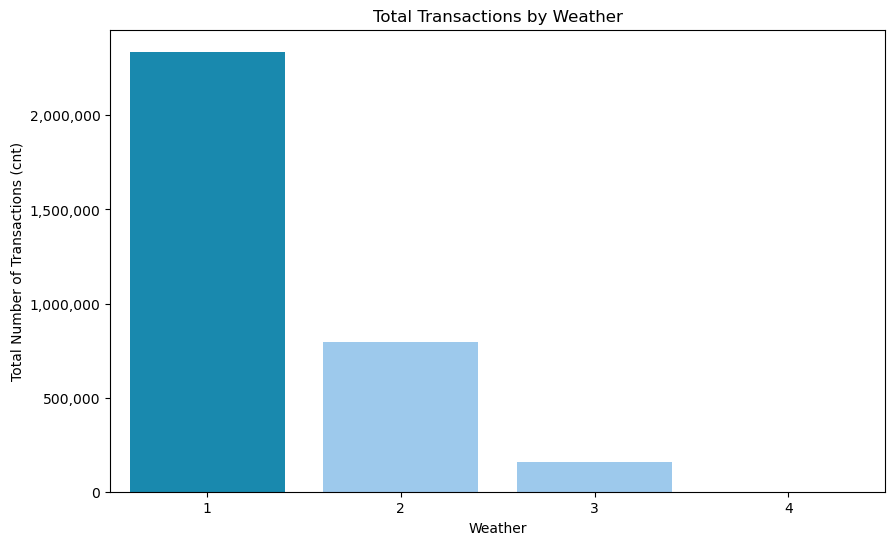

Text(0.5, 1.0, 'Total Transactions by Weather')

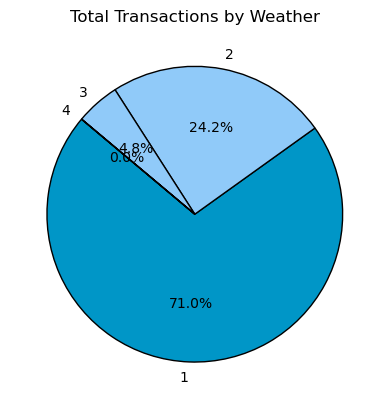

In [85]:
# Plot the season and the transactions that happen using the hour_df because the day_df doesn't include the 4th weather
weather_transactions = hour_df.groupby('weathersit')['cnt'].sum().reset_index()

highest_weather_index = weather_transactions['cnt'].idxmax()

colors = ['#90CAF9'] * len(weather_transactions)
colors[highest_weather_index] = '#0096C7'

# Plotting the total transactions for each season
plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt', data=weather_transactions, palette=colors)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.title('Total Transactions by Weather')
plt.xlabel('Weather')
plt.ylabel('Total Number of Transactions (cnt)')
plt.show()

# Pie chart
plt.pie(
    weather_transactions['cnt'],
    labels=weather_transactions['weathersit'],
    colors=colors,
    autopct='%1.1f%%',  # Adding percentage labels
    startangle=140,  # Rotate the start angle for better visibility
    wedgeprops={'edgecolor': 'black'}  # Adding edge color for better separation
)
plt.title('Total Transactions by Weather')

In [76]:
# Check the day_df transactions happened based on the weekday or weekend
day_df.groupby(by="is_weekend").agg({
  "instant": "nunique",
  "cnt": ["max", "min", "std", "mean", "sum"]
})

instant   cnt                                        
           nunique   max  min          std         mean      sum
is_weekend                                                      
0              522  8227   22  1894.928336  4458.011494  2327082
1              209  8714  627  2039.080571  4620.081340   965597

In [77]:
# Check the hour_df transactions happened based on the weekday or weekend
hour_df.groupby(by="is_weekend").agg({
  "instant": "nunique",
  "cnt": ["max", "min", "std", "mean", "sum"]
})

instant  cnt                                     
           nunique  max min         std        mean      sum
is_weekend                                                  
0            12380  977   1  183.117958  187.971082  2327082
1             4999  957   1  176.993502  193.158032   965597

C:\Users\kvint\AppData\Local\Temp\ipykernel_7476\3574465823.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='is_weekend', y='cnt', data=weekend_transactions, palette=colors)


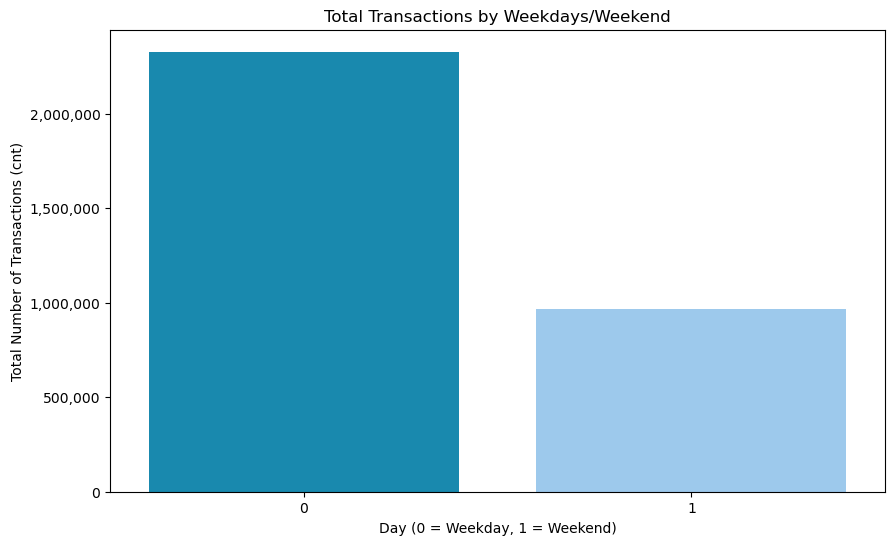

Text(0.5, 1.0, 'Total Transactions by Weekdays/Weekend')

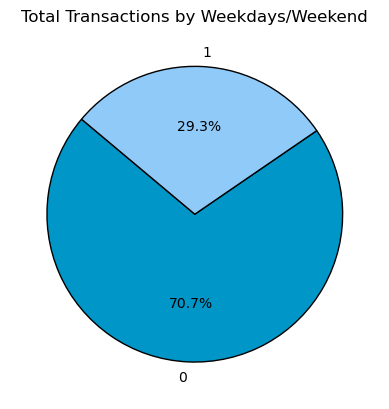

In [84]:
# Plot the season and the transactions that happen using the day_df
weekend_transactions = day_df.groupby('is_weekend')['cnt'].sum().reset_index()

highest_weekend_index = weekend_transactions['cnt'].idxmax()

colors = ['#90CAF9'] * len(weekend_transactions)
colors[highest_weekend_index] = '#0096C7'

# Plotting the total transactions for each season
plt.figure(figsize=(10, 6))
sns.barplot(x='is_weekend', y='cnt', data=weekend_transactions, palette=colors)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.title('Total Transactions by Weekdays/Weekend')
plt.xlabel('Day (0 = Weekday, 1 = Weekend)')
plt.ylabel('Total Number of Transactions (cnt)')
plt.show()

# Pie chart
plt.pie(
    weekend_transactions['cnt'],
    labels=weekend_transactions['is_weekend'],
    colors=colors,
    autopct='%1.1f%%',  # Adding percentage labels
    startangle=140,  # Rotate the start angle for better visibility
    wedgeprops={'edgecolor': 'black'}  # Adding edge color for better separation
)
plt.title('Total Transactions by Weekdays/Weekend')

In [86]:
# To see the monthly transactions
monthly_transactions = day_df.groupby(['year', 'month'])['cnt'].sum().reset_index()

print(monthly_transactions)

    year  month     cnt
0   2011      1   38189
1   2011      2   48215
2   2011      3   64045
3   2011      4   94870
4   2011      5  135821
5   2011      6  143512
6   2011      7  141341
7   2011      8  136691
8   2011      9  127418
9   2011     10  123511
10  2011     11  102167
11  2011     12   87323
12  2012      1   96744
13  2012      2  103137
14  2012      3  164875
15  2012      4  174224
16  2012      5  195865
17  2012      6  202830
18  2012      7  203607
19  2012      8  214503
20  2012      9  218573
21  2012     10  198841
22  2012     11  152664
23  2012     12  123713


**Insight:**
- From the describe(include="all") function, we can see that the transaction is happen from 2011 - 2012, then for the daily data, there is transactions happen in range of 22 - 8714, we can also know that the transaction for the hourly basis is between 1 - 977 transactions.

**Conclusion:**

**Question 1:**
- From the data of the transactions that happen every month, the transactions is changing every month, we can't assume anything from the monthly transactions data.

**Question 2:**
- From transactions that based on the season, we know that the most transactions is happen when the season is fall, the second best is spring, the third is winter, and the last is summer. We know that during summer the weather maybe hot, so people will less using the bike.

**Question 3:**
Weathersit:
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- From transactions that based on the weather, we know that the most transactions is happen when the weathersit is number 1 which is Clear, Few clouds, Partly cloudy. We got the conclusion that the weather is gonna affect the transactions happen on that day. The better the weather, the more the transactions will happen.

**Question 4:**
- From transactions that based on the weekdays/weekend, we know that the sum of transactions happened in weekday is bigger than transactions that happened in weekend, but we must check the mean of the data, we got that the mean of weekend is bigger than the mean of weekdays data. So, we can assume that the transactions that happen in weekend is more than the transactions that happen in weekdays.

